# COGS 108 - YouTube 'How To & Style' Analysis

# Overview - Group #46

For our project, we decided to explore four different areas revolving around the "How To & Style" category for YouTube videos. In these four different areas, we explored four properties of a video and tried to answer our research question. We explored the the quantity of tags used, popular tags used, title sentiment, and upload date of each trending YouTube videos.

These four different sections are named as 
1.   Quantity of Tags vs Views
2.   Usage of Popular Tags vs Views
3.   Title Sentiment vs Views
4.   Upload Date vs Time to Trending 



# Names and IDs

## Names
* Dat Nguyen 

* Tianheng Ma 

* Justin Nguyen 

* Kasidech Tantipanichaphan 

* Samuel Lim 

## IDs

* A12763835 - Dat
* A14891752 - Tianheng
* A14655059 - Justin
* A99006401 - Kasidech
* A14050020 - Samuel

# Research Question

- What combination of number of tags, usage of popular tags, method of phrasing titles, and upload dates should How-to and Style content creators employ to maximize views and minimize time to reach trending?

## Sub Research Questions
1.   Quantity of Tags vs Views: How does the quantity of tags used in a video affect its number of views?
2.   Usage of Popular Tags vs Views: How does the usage  of popular tags used in a trending video affect its number of views?
3.   Title Sentiment vs Views: How does the title sentiment of a video affect its number of views?
4.   Upload Date vs Time to Trending: How does the upload date of a video affect its time to be on trending? 


# Background and Prior Work
* Where did we find the dataset
 * We found the dataset off of Kaggle, we were perusing through their already published datasets.
 
* Why do we choose to use YouTube datasets
 * We chose to use YouTube datasets because everyone today uses YouTube. For those that want to delve into the world of content creation, specifically into How-to and Style content, making great content that balance revenue and growth would be of paramount priority. 
 * There’s a lot of data to use.
 
* Why did we choose to use How To & Style category 
 * There were many factors that we put into selecting this category. As we were sifting through the many categories with many observations in our dataset(1000+), we found that a lot of them were just uninteresting (News and Politics) or required a certain amount of prestige (Entertainment, in the case of it being filled with movie trailers). Therefore, we narrowed it down into How To & Style because it revolved around the creativity of the content creator (what kind of nifty tools they could make out of household products, etc). As such, this category would require certain levels of creativity and skill to thrive, but will clickbait offset this?
 
* What we currently know about the topic
 * We don't really know much, other than recreational use of YouTube. We aren't content creators nor exposed to this type of content.
 
## Previous Work (include links):
1) https://www.kaggle.com/donyoe/exploring-youtube-trending-statistics-eda/report
 * Observed a high correlation between views and likes
 * Made word clouds of titles and tags of youtube videos. Found that titles and tags related to “music”, “new”, “iphone”, and “episode” showed up consistently in popular videos
 * Includes visualizations to depict trends in: views vs likes, likes vs comments, analysis of sentimentality in video descriptions. Notices positive correlations between views, likes, and comments. Sentimentality in descriptions tends to be positive in majority
 
2) https://towardsdatascience.com/strategies-to-be-a-successful-youtuber-extensive-youtube-exploratory-analysis-part-2-2-6862cd4f40be
 * Observed how to be a successful youtuber. Found out that making models per topic would be better. 


# Hypothesis
* Hypothesis: Titles that have positive sentiment will induce more interaction, thus yielding more views. Additionally, videos that are uploaded in the weekends are faster to reach trending. Furthermore, we hypothesize that the more number of tags there are and more popular tags are used, the more views as well.


## Reasons:
For titles that have positive sentiment, we believe that titles with more amicable words will tend to have more views (so as to not give off a negative connotation before the viewer even views the video). To us, this makes sense because videos with negative sentiment are generally looked down upon.

For videos that are uploaded in the weekends, people tend to have more free time, thus more people are going to watch them so they will reach trending quicker.

For videos that have more tags labelled, we believe they will be recommended to more viewers, thus they will get more views.

For popular tags used, we believe that under the How-to and Style section, a lot of makeup gurus tend to publish their videos under this category. With that style of video being the most popular, we expect a great number of videos to represent that tag. Additionally, food creation videos (recipe videos) are also very popular. Thus, food tags, in a similar fashion to make up tags, will be highly represented.

# Dataset(s)

* Dataset Name: Trending Youtube Video Statistics
* Variables Included : Tags, Publish Date, Trending Date, Views, Titles
* Link to the dataset: https://www.kaggle.com/datasnaek/youtube-new/version/114
* Number of observations: 4,000 (specific to the How-to & Style category)


# Setup

These are the step for general set-up across all of the analyses we have done. It allows for use of our general dataset, in addition to using np/pd/matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**We have 4 different sections throughout this notebook. Each section pertains to a different topic that we worked on. For that reason, we have 4 different set-ups, 4 different data cleaning sections, and 4 different data analysis sections. **

### Create a General Dataframe Called "youtube"

We will only keep the columns 'title', 'tags', 'views', 'trending_date', and 'publish_time'. We also drop any rows with null values.

Note : We clean the data here because the other set-ups rely on 'youtube'

In [2]:
#take in csv file and set category to How-to and Style
youtube = pd.read_csv("USvideos.csv")
youtube = youtube[youtube['category_id']==26]

# clean out columns that aren't relevant and drop nulls
youtube = youtube[['title','tags','views','trending_date','publish_time']]
youtube.reset_index(drop=True, inplace=True)
youtube = youtube.dropna()
youtube.head()

,title,tags,views,trending_date,publish_time
0,"What $4,800 Will Get You In NYC | Sweet Digs H...","refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",145921,17.14.11,2017-11-12T16:00:01.000Z
1,A Smart... MUG?! - Take apart a Heated Thermos!,"Smart mug|""Heated thermos""|""tech""|""gift idea""|...",120727,17.14.11,2017-11-13T16:00:03.000Z
2,iPhone X vs Makeup Transformation (Face ID TEST),"iphone x|""iphonex makeup""|""iphonex test""|""new ...",1456472,17.14.11,2017-11-12T00:45:54.000Z
3,John Lewis Christmas Ad 2017 - #MozTheMonster,"christmas|""john lewis christmas""|""john lewis""|...",7224515,17.14.11,2017-11-10T07:38:29.000Z
4,A VERY #EXTRA EBAY SHOPPING HAUL!,"ebay|""haul""|""cheap""|""challenge""|""extra""|""amber...",484185,17.14.11,2017-11-11T02:42:23.000Z


## Quantity of Tags vs Views Set-up

### Process Tags Into Our Dataframe

We store tags of each video in a list, which we keep in the variable 'new_tags'.

We store the number of tags of each video in a list, which we keep in the variable 'count_tags'

Finally, we add the number of each tag into youtube['count_tags'] and update the string of tags with the list of tags in youtube['tags']

In [3]:

quantTagsDF = youtube.copy()

countTagsSeries = quantTagsDF['tags']
tags_new = list(countTagsSeries)

new_tags = []
count_tags = []

# Split words in tags into a list of tags
for s in tags_new:
    s = s.split('|')
    new_tags.append(s)

# Make list of how many tags are in each video
for i in new_tags:
    count_tags.append(len(i))

# Prepare count_tags to be added into dataframe
count_tag = np.array(count_tags, dtype=np.int64)
count_tag = pd.Series(count_tag)

# Add count_tag to dataframe
quantTagsDF['count_tags'] = count_tag.values
quantTagsDF['tags'] = new_tags

quantTagsDF.head(10)

,title,tags,views,trending_date,publish_time,count_tags
0,"What $4,800 Will Get You In NYC | Sweet Digs H...","[refinery29, ""refinery 29"", ""r29"", ""r29 video""...",145921,17.14.11,2017-11-12T16:00:01.000Z,35
1,A Smart... MUG?! - Take apart a Heated Thermos!,"[Smart mug, ""Heated thermos"", ""tech"", ""gift id...",120727,17.14.11,2017-11-13T16:00:03.000Z,18
2,iPhone X vs Makeup Transformation (Face ID TEST),"[iphone x, ""iphonex makeup"", ""iphonex test"", ""...",1456472,17.14.11,2017-11-12T00:45:54.000Z,17
3,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",7224515,17.14.11,2017-11-10T07:38:29.000Z,9
4,A VERY #EXTRA EBAY SHOPPING HAUL!,"[ebay, ""haul"", ""cheap"", ""challenge"", ""extra"", ...",484185,17.14.11,2017-11-11T02:42:23.000Z,12
5,EXTREME GOLDEN TAN TRANSFORMATION,"[Extreme Tan, ""Tanning"", ""Tanning Bed"", ""How t...",300617,17.14.11,2017-11-10T20:40:44.000Z,13
6,Inside the Cheese-Aging Caves 30 Feet Under Br...,"[cave, ""cheese"", ""goat"", ""rind"", ""sheep's milk...",92523,17.14.11,2017-11-10T16:01:04.000Z,28
7,ICE PRIMER? DOES IT WORK?!,"[ice primer, ""beauty hack"", ""weird beauty hack...",103927,17.14.11,2017-11-11T05:23:36.000Z,5
8,How To Dry a Shirt in 30 Seconds,"[how to dry a shirt in 30 seconds, ""how to dry...",2063667,17.14.11,2017-11-09T18:36:48.000Z,9
9,Surprise After Surprise | October Vlog,"[jenn im, ""jenn im vlog"", ""imjennim"", ""october...",247319,17.14.11,2017-11-10T18:42:55.000Z,9


## Usage of Popular Tags vs Views Set-up

### To get the 10 most popular tags.

We use value_counts method to count the number of mentioning tags and put it in dataframe (this step is done later in the data cleaning section).

In [4]:
usePopTagsDF = youtube.copy()

tags = usePopTagsDF['tags'].apply(pd.Series).stack()
tags_df = usePopTagsDF['tags'].apply(pd.Series).stack()
pop_tags = usePopTagsDF['tags'].apply(tuple).value_counts()

## Title Sentiment vs Views Set-up


Here we are performing a sentiment analysis on the titles of all the videos on our data set in order to determine if there is a relationship between the amount of views and its overall sentiment score. We used the Vader Lexicon from the NLTK package.

In [5]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

titleSentDF = youtube.copy()

nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tma2017/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/Users/tma2017/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "



We write a function in order to allow us to view different subsets of our Youtube video dataframe. This will be helpful when we compare extremely viral videos versus the rest of the dataframe.

In [6]:
def title_sentiments(df):
    title_sentiment = []
    title_sentiment_ind = []

    titles = df['title']

    zero_sentiment = 0

    # Add only non-zero sentiment analysis of titles into 'title_sentiment'
    for i, title in zip(range(len(titles)), titles):
        sentiment = analyser.polarity_scores(title)
        
        if sentiment['compound'] != 0:
            title_sentiment.append(sentiment['compound'])
            title_sentiment_ind.append(i)
        if sentiment['compound'] == 0:
            zero_sentiment += 1
            
    return title_sentiment, title_sentiment_ind, zero_sentiment

## Upload Date vs Time to Trending Set-up

In this section, we are performing an analysis on the correlation of upload dates and trending dates and see how an average of how long it would take a content creator to get onto trending.

In [7]:
import datetime
import researchpy as rp

In [8]:
uploadDF = youtube.copy() #We just wanted a simple way to copy over the DF without ruining the original one.

# Data Cleaning

"What methods did you use to analyze your data? Briefly explain what steps you had to take before you were able to use the datasets you chose to answer your question of interest."

- Taking averages and t-testing. OLS regression and sentiment analysis.

"How clean is the data?"

- The data had extraneous columns beforehand

"What did you have to do to get the data into a usable format?"

- It was already 'usable' but just to make it neater and more concise, we eliminated some columns

"What pre-processing steps were required for your methods (for example checking data distributions and performing any transformations that may be required)"

- We didn't have to really make any transformations. To check data distributions, we printed out certain intervals or criteria so that we can see discrepancies.

## Quantity of Tags vs Views Data Cleaning

We only retain the columns of title, tag, views, and count_tags because they are the only ones relevant to this section.
We drop duplicates by keeping only the last one. We do this because we do not want the same video to have the same tags double-counted. We get the last one because we want the video with the most views.


In [9]:
quantTagsDF = quantTagsDF[['title','tags','views','count_tags']]
quantTagsDF = quantTagsDF.dropna()
quantTagsDF.drop_duplicates(subset = 'title', keep = 'last',inplace = True)
quantTagsDF.head()

,title,tags,views,count_tags
12,Three meals that cost me $1.50 each,"[brothers green eats, ""budget cooking"", ""cooki...",77630,19
13,"Chapter 28: I Love My Baby But, I Miss My Dad","[Whitney Port, ""I Love My Baby But"", ""Grief"", ...",55398,6
14,FACE SURGERY WITH MAKEUP,"[makeup, ""makeup tutorial"", ""surgery"", ""transf...",471266,28
15,Chocolate Orange Autumn Cupcakes | Cupcake Jemma,"[cupcakes, ""cupcake"", ""cup cake"", ""cake"", ""cak...",122669,36
16,My Every Day Autumn Makeup | Zoella,"[zoe sugg, ""zoe"", ""sugg"", ""zoella"", ""beauty"", ...",1390440,22


## Usage of Popular Tags vs Views Data Cleaning

For popular tags, we drop the duplicates of the counts subset. 



In [10]:
pop_tagsDF = pd.DataFrame({'tags':pop_tags.index, 'counts':pop_tags.values})
pop_tagsDF = pop_tagsDF.drop_duplicates(subset=['counts']) #Drop duplicates
pop_tagsDF.head()

,counts,tags
0,31,"(c, u, p, c, a, k, e, s, |, "", h, o, w, , t, ..."
2,27,"(t, h, e, , g, r, e, e, n, , m, a, k, e, u, ..."
4,25,"([, n, o, n, e, ])"
7,23,"(o, l, i, v, i, a, , j, a, d, e, |, "", o, l, ..."
8,21,"(j, a, c, l, y, n, h, i, l, l, 1, |, "", j, a, ..."


## Title Sentiment vs Views Data Cleaning


We make sure to drop any duplicate rows that are a result of a video that trends for multiple days. While this information may be helpful when examining how long it takes for a video to become popular after being published, for the purposes of sentiment analysis it only adds more noise to the data.

We also print out the first 50 titles that return non-zero sentiments using NLTK vader.

In [11]:
# Drop duplicate titles, we are only interested in the last title that was trending
titleSentDF.drop_duplicates(subset='title', keep='last',inplace=True)

title_sentiment, title_sentiment_ind, zero_sentiment = title_sentiments(titleSentDF)

# Print out test results
print('Sentiment score of first 50 titles with non-zero sentiment scores:')
print(title_sentiment[:50])
print('\nIndex of the first 50 non-zero sentiment titles')
print(title_sentiment_ind[:50])
print('\nNumber of sentiment videos: ' + str(len(title_sentiment_ind)))
print("Number of Zero sentiment videos: " + str(zero_sentiment))

Sentiment score of first 50 titles with non-zero sentiment scores:
[0.5574, -0.7088, 0.4939, 0.4588, 0.2342, -0.2732, 0.7964, 0.0516, 0.2263, -0.3612, 0.4588, -0.4404, -0.1779, 0.4926, 0.7579, -0.128, 0.5106, 0.5859, -0.4619, 0.8225, 0.6239, 0.3818, 0.7096, -0.4767, 0.4728, 0.5719, 0.4019, 0.658, 0.2584, 0.4215, -0.34, 0.4019, 0.5859, -0.3612, 0.2023, -0.4215, 0.5106, 0.4939, 0.5719, 0.4278, 0.4404, 0.3182, 0.6739, -0.7604, 0.5859, 0.0989, 0.4404, 0.5859, 0.508, 0.6037]

Index of the first 50 non-zero sentiment titles
[1, 5, 7, 11, 23, 24, 25, 26, 27, 30, 32, 33, 34, 35, 38, 40, 45, 47, 51, 54, 56, 57, 58, 62, 63, 64, 65, 67, 69, 73, 74, 77, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 94, 95, 97, 103, 105, 106, 107]

Number of sentiment videos: 280
Number of Zero sentiment videos: 322


## Upload Date vs Time to Trending Data Cleaning

To clean this data, we want to make sure our columns are in the same format. Therefore, we rewrite our strings so that they're following the same format.

In [12]:
uploadDF = uploadDF[['publish_time', 'trending_date']] #for this analysis, these are the only two relevant columns

uploadDF['publish_time'] = uploadDF['publish_time'].str[:10].astype(str) # to better parse our data, we convert them to str

uploadDF['trending_date'] = '20' + uploadDF['trending_date'] # modify trending_date so it is in the same format as publish_time
uploadDF['trending_date'] = uploadDF['trending_date'].str.replace('.','-')

uploadDF['trending_date'] = uploadDF['trending_date'].str[0:4]+uploadDF['trending_date'].str[7:10]+uploadDF['trending_date'].str[4:7]
uploadDF.head()

uploadDF['trending_date'] = pd.to_datetime(uploadDF['trending_date']) #convert both of the columns to 'datetimes'
uploadDF['publish_time'] = pd.to_datetime(uploadDF['publish_time'])

uploadDF['publish_to_trending'] = uploadDF['trending_date'] - uploadDF['publish_time'] #subtract the two times to get the amt to get to trending

uploadDF = uploadDF.drop(columns=["trending_date"]) #just drop trending date, irrelevant to us now

uploadDF.head(10)

,publish_time,publish_to_trending
0,2017-11-12,2 days
1,2017-11-13,1 days
2,2017-11-12,2 days
3,2017-11-10,4 days
4,2017-11-11,3 days
5,2017-11-10,4 days
6,2017-11-10,4 days
7,2017-11-11,3 days
8,2017-11-09,5 days
9,2017-11-10,4 days


# Data Analysis and Results




## Quantity of Tags vs Views Data Analysis and Results

In this section, we focus on investigating whether the __total number of tags__ used in a video will affect the number of __views__ it get.

In order to better see how the __count_tags__ column correlates with the __views__ column, we decided to graph the data in a scatter plot

Text(0,0.5,'num_views')

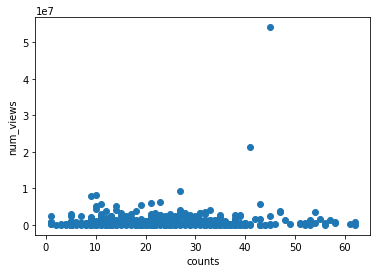

In [13]:
# get the counts of the tags for each video
counts = list(quantTagsDF['count_tags'])
num_views = list(quantTagsDF['views'])

plt.scatter(counts,num_views)
plt.xlabel("counts")
plt.ylabel("num_views")

Here we can see that there are two extremely large value, which indicates two videos that have extremely large views. Since these two datapoints are too far away from the rest of the datapoints, they do not represent the overall correlation between __count_tags__ and __views__ column. 

Therefore, to better to picture the the overall correlation between these two columns, we will remove the outliers from the datasets by removing all datapoints that are above 10 million views

Text(0,0.5,'Views')

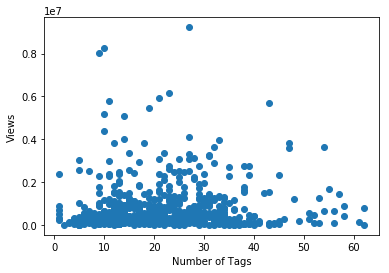

In [36]:
# Creating a new dataframe that only includes datapoints that have less or equal to 10 million views
youtube_10m = quantTagsDF[quantTagsDF['views']<=10000000]
counts = list(youtube_10m['count_tags'])
num_views = list(youtube_10m['views'])

# Plot again
plt.scatter(counts,num_views)
plt.xlabel("Number of Tags")
plt.ylabel("Views")


It's difficult to see any trend from this scatter plot. Therefore, we will build a linear model to try to predict our result. 

According to our hypothesis, we believed that the number of views is positively correlated with the number of tags, since videos with more tags are likely to see by more people. If our model shows that the two values are negatively correlated or not correlated, then it will prove our hypothesis is false. 

In the following graph, we will plot our prediction on top of our scatter plot to visualize see how well the model fits the data 


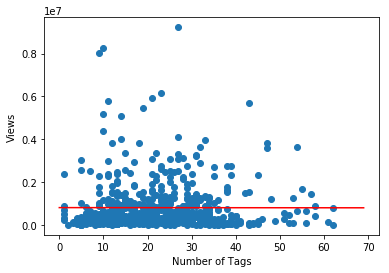

In [37]:
# Plot the scatter plot again
plt.scatter(counts,num_views)
plt.xlabel("Number of Tags")
plt.ylabel("Views")

# Use ployfit to get the best fit line, and show it in the graph
a1, b1 = np.polyfit(youtube_10m['count_tags'], youtube_10m['views'], 1)
count_tags_range = np.arange(0., 70.)
pred_views = a1 * count_tags_range + b1
plt.plot(count_tags_range, pred_views, c  ='r')

As we can see from the graph, there doesn't seem to be like a strong correlation between the number of tags and views. To check if our intuition is correct, we will use scipy's linegress method to get the r value, which indicates how well are the two correlated. 

The r value ranges from -1 to 1. If the r value is -1, it means our data shows a perfectly negative relationship; if the r value is is 1, it means our data shows a perfectly postive relationship; if the r value is is 0, it means our data shows no relationship.

In [38]:
import scipy.stats
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(youtube_10m['count_tags'], youtube_10m['views'])

print("r value is: ",r_value)

r value is:  -0.0012811657995536235


From the result, we can see that the r value is close to 0, which indicates that there is not a clear relationship between the number of tags used and the views of a video. 

Therefore, our hypothesis regarding the relationship between the number of tags used and the views is proven to be false

## Usage of Popular Tags vs Views Data Analysis and Results

For the popular tags, we create the top 10 counts from the dataframe. Then, we collerated it to the number of views of each tags. 

In [14]:
pop_tagsDF = pop_tagsDF.head(10)

dict_popTags = {}
for elem,count in zip(pop_tagsDF['tags'], pop_tagsDF['counts']) : #zip the tags and count of how many videos they're in
    
    dict_popTags[elem[0]] = count

list_popTags = list(dict_popTags.keys()) #only extract the tags

dict_popViews = {}

for popTag in list_popTags:
    
    currViews = 0
    for tags,views in zip(usePopTagsDF['tags'],usePopTagsDF['views']):
        if(popTag in tags):
            currViews = currViews + views #accumulate the views
    
    dict_popViews[popTag] = currViews
    
dict_popViews 

{'[': 41588638,
 'c': 3903763073,
 'f': 3515759998,
 'j': 1545645901,
 'k': 3741729499,
 'l': 4002388036,
 'o': 4048073780,
 's': 4022986226,
 't': 3994705928,
 'z': 1380854589}

Here, we calculate the mean of the views for the 10 most popular tags. We plan to use this to plot it against the views we get for each popular tag, and see if using a more popular tag will nececessarily mean that it garners more views.


In [15]:
dict_popMeans = {}
for tag in dict_popViews:
    dict_popMeans[tag] = dict_popViews[tag] / dict_popTags[tag]

    
dict_popMeans 

{'[': 1663545.52,
 'c': 125927841.06451613,
 'f': 219734999.875,
 'j': 73602185.76190476,
 'k': 207873861.05555555,
 'l': 210652001.89473686,
 'o': 176003207.82608697,
 's': 201149311.3,
 't': 147952071.4074074,
 'z': 81226740.52941176}

Next, we plot the tags versus the mean views. The y-axis resembles the mean views, while the x-axis were the top 10 tags. Out of those tags, the most popular one is beauty.

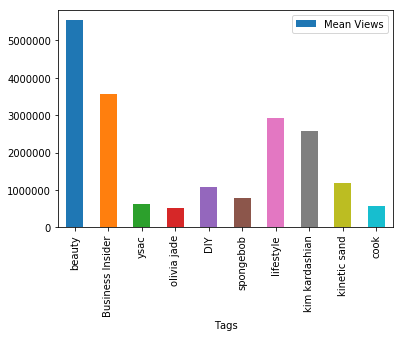

In [42]:
data = [['beauty', 5539308.064516129], ['Business Insider', 3573679.111111111], ['ysac', 620388.0], ['olivia jade', 523903.82608695654], ['DIY', 1071556.0], ['spongebob', 784910.3], ['lifestyle', 2926548.947368421], ['kim kardashian', 2576792.777777778], ['kinetic sand', 1193684.8823529412], ['cook', 577825.5]]
df_pop = pd.DataFrame(data, columns = ['Tags', 'Mean Views'])
ax = df_pop.plot.bar(x='Tags', y='Mean Views', rot=90) #plot



## Title Sentiment vs Views Data Analysis and Results


First, we graph all of the video titles that returned a non-zero sentiment (i.e. the NLTK toolkit was able to return a sentiment score) against its number of views.

Text(0,0.5,'Number of views')

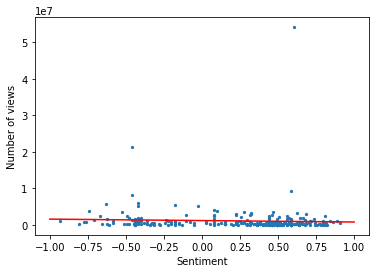

In [17]:
views = list(titleSentDF['views'])
views_sent = []

for i in title_sentiment_ind:
    views_sent.append(views[i])

a_views, b_views = np.polyfit(title_sentiment, views_sent,1 )  
sentiment_range = np.linspace(-1, 1, 10)
pred_views = a_views*sentiment_range + b_views

plt.scatter(title_sentiment, views_sent, s=5)
plt.plot(sentiment_range, pred_views, c = 'red')
plt.xlabel('Sentiment')
plt.ylabel('Number of views')

Text(0,0.5,'Frequency')

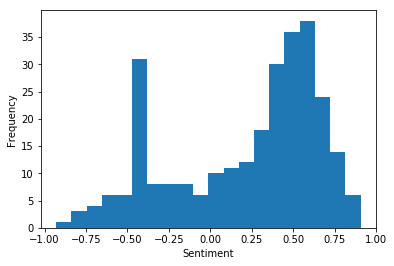

In [18]:
plt.hist(title_sentiment, bins=20)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

Looking at the above two graphs, by inspection we have a feeling that there is not a strong correlation between sentiment and number of views. Representing the sentiment with a histogram, we see how the title sentiments are bimodal. More videos tend to populate the -0.50 and 0.50 areas of sentimentality. We also notice that there are some videos with large numbers of views (i.e. > 5,000,000 views).

Next, we are going to run an OLS regression model to calculate some statistics and run statistical tests.

In [19]:
import patsy
import statsmodels.api as sm

data = {'title_sentiment': title_sentiment, 'views_sent': views_sent}
sentiment_df = pd.DataFrame(data=data)

outcome_1, predictors_1 = patsy.dmatrices('title_sentiment ~ views_sent', data=sentiment_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

/Users/tma2017/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:        title_sentiment   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6447
Date:                Tue, 11 Jun 2019   Prob (F-statistic):              0.423
Time:                        18:16:20   Log-Likelihood:                -168.26
No. Observations:                 280   AIC:                             340.5
Df Residuals:                     278   BIC:                             347.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2278      0.028      8.229      0.0


From the above result, using an alpha of 0.01, we conclude that we don't have statistically significant evidence (i.e. Prob(F-stat) >> 0.01) that a youtube video's title sentiment is correlated with its number of views.

However, what if this is due to those 'viral' videos (i.e. views > 5,000,000) that we mentioned above? In the next part we run seperate tests on videos with >5,000,000 views and <5,000,000 views.

Text(0,0.5,'Number of Views')

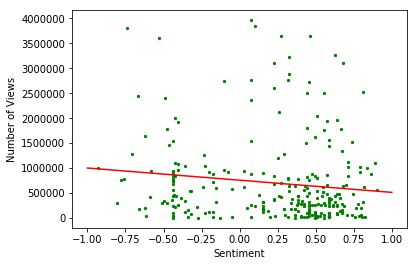

In [20]:
views_sent_norm = []

youtube_norm = titleSentDF[titleSentDF['views'] < 5_000_000]

views = list(youtube_norm['views'])

title_sentiment_norm, title_sentiment_ind_norm, zero_sentiment_norm = title_sentiments(youtube_norm)

for i in title_sentiment_ind_norm:
    views_sent_norm.append(views[i])
    
a_norm, b_norm = np.polyfit(title_sentiment_norm, views_sent_norm, 1)
sent_norm_range = np.linspace(-1, 1, 10)
views_norm_pred = a_norm*sent_norm_range + b_norm


plt.scatter(title_sentiment_norm, views_sent_norm, s=5, c='g')
plt.plot(sent_norm_range, views_norm_pred, c = 'red')
plt.xlabel('Sentiment')
plt.ylabel('Number of Views')

Text(0,0.5,'Frequency')

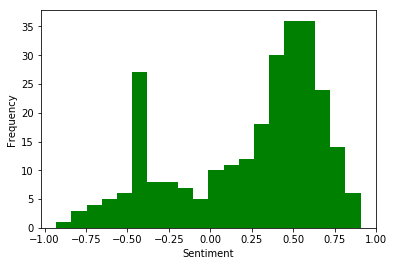

In [21]:
plt.hist(title_sentiment_norm, bins=20, color='green')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

In this scatterplot, the videos whose view counts exceed 5,000,000 are left out in order to observe the data clusters in better detail. When we fit a linear model, we observe a negative correlation between title sentiment and number of views, which is unexpected. Next we will see if this fit is statistically significant.

In [22]:
data = {'title_sentiment': title_sentiment_norm, 'views_sent': views_sent_norm}
sentiment_df_norm = pd.DataFrame(data=data)

outcome_1, predictors_1 = patsy.dmatrices('title_sentiment ~ views_sent', data=sentiment_df_norm)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:        title_sentiment   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.367
Date:                Tue, 11 Jun 2019   Prob (F-statistic):             0.0376
Time:                        18:16:21   Log-Likelihood:                -157.72
No. Observations:                 271   AIC:                             319.4
Df Residuals:                     269   BIC:                             326.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2796      0.034      8.146      0.0

Once again, even when we exclude 'viral' videos we don't have statistically significant evidence that sentiment is correlated with the number of views a video gets.

Lastly, let's see if there is a correlation between sentiment and number of views in 'viral' videos.

Text(0,0.5,'Number of Views')

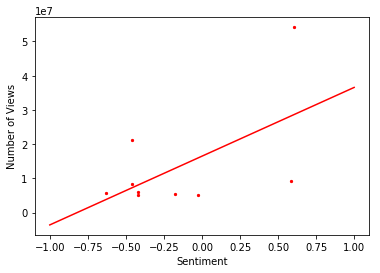

In [23]:
views_sent_viral = []

youtube_viral = titleSentDF[titleSentDF['views'] > 5_000_000]

views = list(youtube_viral['views'])

title_sentiment_viral, title_sentiment_ind_viral, zero_sentiment_viral = title_sentiments(youtube_viral)

for i in title_sentiment_ind_viral:
    views_sent_viral.append(views[i])

a_views_viral, b_views_viral = np.polyfit(title_sentiment_viral, views_sent_viral, 1)
title_sent_viral_range = np.linspace(-1, 1, 10)
views_viral_pred = a_views_viral*title_sent_viral_range + b_views_viral

plt.scatter(title_sentiment_viral, views_sent_viral, s=5, c='r')
plt.plot(title_sent_viral_range, views_viral_pred, c = 'r')
plt.xlabel('Sentiment')
plt.ylabel('Number of Views')

Text(0,0.5,'Frequency')

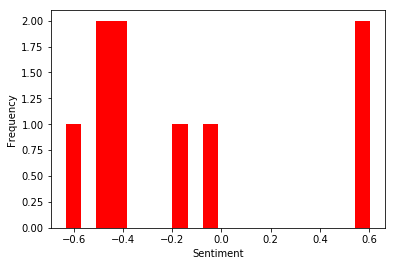

In [24]:
plt.hist(title_sentiment_viral, bins=20, color='red')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

Now we observe a positive correlation when we fit a linear model on the data of just the 'viral' videos. Next we will run another test to see if this correlation is statistically significant.

In [25]:
data = {'title_sentiment': title_sentiment_viral, 'views_sent': views_sent_viral}
sentiment_df_viral = pd.DataFrame(data=data)

outcome_1, predictors_1 = patsy.dmatrices('title_sentiment ~ views_sent', data=sentiment_df_viral)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:        title_sentiment   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     3.422
Date:                Tue, 11 Jun 2019   Prob (F-statistic):              0.107
Time:                        18:16:22   Log-Likelihood:                -3.4625
No. Observations:                   9   AIC:                             10.93
Df Residuals:                       7   BIC:                             11.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3742      0.179     -2.092      0.0

/Users/tma2017/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


At this point, even amongst 'viral' videos it is no surprise that there is no correlation between sentiment and number of views.

Text(0,0.5,'Number of Views')

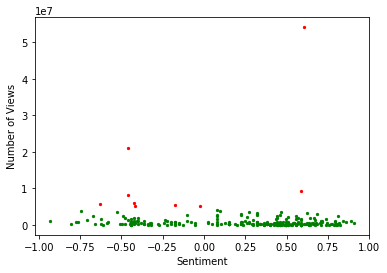

In [26]:
plt.scatter(title_sentiment_norm, views_sent_norm, s=5, c='g')
plt.scatter(title_sentiment_viral, views_sent_viral, s=5, c='r')
plt.xlabel('Sentiment')
plt.ylabel('Number of Views')

Text(0,0.5,'Frequency')

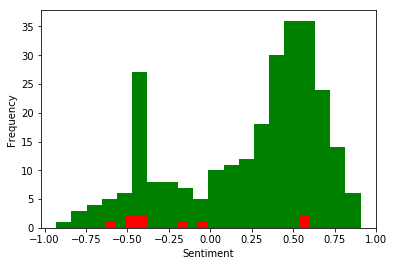

In [27]:
plt.hist(title_sentiment_norm, bins=20, color='green')
plt.hist(title_sentiment_viral, bins=20, color='red')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

## Upload Date vs Time to Trending Data Analysis and Results

In this section, our goal was to find out how can the upload date of the video affect its time to reach trending on YouTube. Specifically, we wish to explore whether uploading a video on a weekend or a weekday made a difference in terms of minimizing its time to reach trending.

First, we split the dataframe into two parts based on whether the upload time of the video is a weekend or not. 

In [28]:
# uploadDF_weekends contains all the videos that have upload time in the weekends
uploadDF_weekends = uploadDF[uploadDF['publish_time'].dt.dayofweek >= 5] 
# uploadDF_weekdays contains all the videos that have upload time in the weekdays
uploadDF_weekdays = uploadDF[uploadDF['publish_time'].dt.dayofweek < 5]

Now, we wanted to find the average amount of days it would take for a video to reach trending from both the weekend and weekdays.

In [29]:
mean_weekends= uploadDF_weekends["publish_to_trending"].mean()
mean_weekdays = uploadDF_weekdays["publish_to_trending"].mean()
print('Average time to trending')
print("weekends: ",mean_weekends)
print("weekdays: ",mean_weekdays)

print('\n')

sd_weekends = uploadDF_weekends["publish_to_trending"].std()
sd_weekdays = uploadDF_weekdays["publish_to_trending"].std()
print("Standard Deviations")
print("weekends: ",sd_weekends)
print("weekdays: ",sd_weekdays)

Average time to trending
weekends:  6 days 13:30:17.070600
weekdays:  8 days 07:32:40.462934


Standard Deviations
weekends:  4 days 15:17:34.906387
weekdays:  31 days 22:07:38.284176


To visualize our findings, we graphed the data in a bar chart

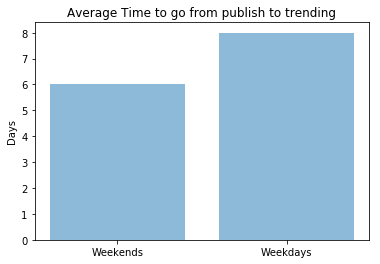

In [30]:
# Visualizing the result
objects = ('Weekends', 'Weekdays')
y_pos = np.arange(len(objects))
performance = [6,8]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Days')
plt.title('Average Time to go from publish to trending')

plt.show()

From the result above, we hypothesize that the average time to reach trending when uploading in weekends is shorter than that in weekdays. To further check our hypothesis, we wanted to apply a t-test to make sure that our results make sense.

In [31]:
uploadDF_weekends["weekends_ptt"] = uploadDF_weekends["publish_to_trending"].dt.days
uploadDF_weekdays["weekdays_ptt"] = uploadDF_weekdays["publish_to_trending"].dt.days

descriptives, results = rp.ttest(uploadDF_weekends["weekends_ptt"],uploadDF_weekdays["weekdays_ptt"])
results

/Users/tma2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tma2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Independent t-test,results
0,Difference (weekends_ptt - weekdays_ptt) =,-1.7517
1,Degrees of freedom =,4144.0000
2,t =,-1.6850
3,Two side test p value =,0.0921
4,Mean of weekends_ptt > mean of weekdays_ptt p ...,0.0460
5,Mean of weekends_ptt < mean of weekdays_ptt p ...,0.9540
6,Cohen's d =,-0.0623
7,Hedge's g =,-0.0623
8,Glass's delta =,-0.3777
9,r =,0.0262


From the t-test above, we can see that the probability that our hypothesis is true is calculated to be 95.4%, which confirms our hypothesis. 

For a more specific analysis, we wanted to take a look at each individual day and see if it was any different from the data we got from generalizing the days of the weeks into two categories.

In [33]:
uploadDF_mon = uploadDF[uploadDF['publish_time'].dt.dayofweek ==0]
uploadDF_tue = uploadDF[uploadDF['publish_time'].dt.dayofweek ==1]
uploadDF_wed = uploadDF[uploadDF['publish_time'].dt.dayofweek ==2]
uploadDF_thu = uploadDF[uploadDF['publish_time'].dt.dayofweek ==3]
uploadDF_fri = uploadDF[uploadDF['publish_time'].dt.dayofweek ==4]
uploadDF_sat = uploadDF[uploadDF['publish_time'].dt.dayofweek ==5]
uploadDF_sun = uploadDF[uploadDF['publish_time'].dt.dayofweek ==6]

mean_mon = uploadDF_mon["publish_to_trending"].mean()
mean_tue = uploadDF_tue["publish_to_trending"].mean()
mean_wed = uploadDF_wed["publish_to_trending"].mean()
mean_thu = uploadDF_thu["publish_to_trending"].mean()
mean_fri = uploadDF_fri["publish_to_trending"].mean()
mean_sat = uploadDF_sat["publish_to_trending"].mean()
mean_sun = uploadDF_sun["publish_to_trending"].mean()

print("Average time to reach trending")
print("Mon: ",mean_mon)
print("Tue: ",mean_tue)
print("Wed: ",mean_wed)
print("Thu: ",mean_thu)
print("Fri: ",mean_fri)
print("Sat: ",mean_sat)
print("Sun: ",mean_sun)

Average time to reach trending
Mon:  6 days 22:06:42.484472
Tue:  8 days 21:10:56.859971
Wed:  10 days 04:56:35.121951
Thu:  7 days 14:59:13.911806
Fri:  7 days 04:24:35.618374
Sat:  5 days 23:26:03.064833
Sun:  7 days 05:46:54.545454


To visualize our findings, we graphed the data in a bar chart

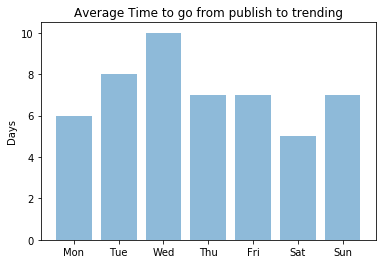

In [34]:
objects = ('Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun')
y_pos = np.arange(len(objects))
performance = [6,8,10,7,7,5,7]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Days')
plt.title('Average Time to go from publish to trending')

plt.show()

From the result above, we can see that uploading on Wednesday would help the video reach trending the quickest

# Ethical Considerations and Privacy 

In general, because the dataset is viewable among the public on Kaggle, therefore it doesn't really violate the personal information of any individual. We didn't include any private video information to perform our analysis.

The person who is negatively affected by your finding could be the owners. Even though they wouldn't mind sharing their videos, however, we are using their privacy informations regarding their video to perform our analysis, without their permission. The content that we observe such as how to & style. Our findings could negatively affect the variability of content found in the How To & Style category.  

People who could make money off of our findings include potential content creators and companies that sponsor YouTube / these content creators. It is not necessarily an exploiting way to generate money, but some content can be deemed immoral (by viewers and other content creators.) But no personal information is going to be leaked because there is no such thing in our dataset.

Also, the dataset could contain some biases that could create results that are unrepresentative of actual Youtube trends. Currently, we found that there is no specific group that is the most successful in this genre. Nevertheless, it is hard to see that this dataset is biased, as it seems that it was created using automated processes. Upon further research, the dataset has no mention of race, gender, occupation, or religious preference. Though, this does not change the fact that the creator may have altered their dataset. Therefore, the data that we've reported could be biased.


# Conclusion and Discussion 

As a reminder, our hypothesis was : "Titles that have positive sentiment will induce more interaction, thus yielding more views. Additionally, popular videos are more likely to be uploads that are on the weekends. Furthermore, we hypothesize that the more number of tags there are, the more views as well, in addition to using more popular tags."

In the end, we discovered that for the date of upload, our hypothesis was correct. The upload date played a role in views attained because the average days to trending were lower on the weekends rather than the weekdays. As a result, it was faster to reach trending if one were to upload on a weekend and thus reap more views. We took this approach because we believed that people had more free time on the weekends to spend leisurely on YouTube. As a result, more leisure time would be correlated with more YouTube usage. Thus, more binge-watching videos on the weekends.


The number of tags was also a similar concept. Since some content creators had more tags than other, they gained more exposure thanks to people exploring those tags. Therefore, the more exposure their video got via crossing with other tags increased their viewership. 

To further elaborate on the tags, we found out that the top ten popular tags were beauty, business insider, ysac, olivia jade, DIY, spongebob, lifesttyle, kim kardashian, kinetic sand, and cook from this dataset. With the most popular tag related to beauty. And the least popular tag related to cook. This is based on the number of views of those tags.

Finally, for the sentiment analysis, in general, there tended to be more videos with positive sentiments than negative ones. However, based on our findings in this section, we conclude that there is no strong, univariate correlation between a youtube video's sentiment score (based on the NLTK vader's sentiment analysis) and its number of views. We did notice that videos tend to be bimodal around the +0.50 and -0.50 sentiment marks, although this has nothing to do with the popularity of the videos themselves. Additionally, there also was a tendency for viral videos (videos with over 5,000,000 views) to lean towards the negative sentiment side, although this could be due to a low viral video population.

In general, one limitation of our project is that our study only inlcudes 4000 videos, whereas there are millions of trending on YouTube. This dataset only includes the videos in 2017-2018, which does not represent the YouTube throughout the years. If we have more observations, we could have a more powerful analysis. 